# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
#ex: pd.cut()
ages = [18,22,25,27,21,23,37,31,61,90]
rule = [17,25,35,60,90]
pd.cut(ages, bins=rule).value_counts()

(17, 25]    5
(25, 35]    2
(35, 60]    1
(60, 90]    2
dtype: int64

In [5]:
#1
"""
Your code here
"""
cut_rule = [-1, 0, 2, 5, 20]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-1.001, 0.0]    215371
(0.0, 2.0]        87868
(2.0, 5.0]         4230
(5.0, 20.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [6]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,"(-1.001, 0.0]"
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(-1.001, 0.0]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(-1.001, 0.0]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,"(-1.001, 0.0]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(-1.001, 0.0]"


In [7]:
#2-1
"""
Your code here
"""
grp = ["TARGET", "CNT_CHILDREN_GROUP"]

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

TARGET  CNT_CHILDREN_GROUP
0       (-1.001, 0.0]         166747.010980
        (0.0, 2.0]            174590.584401
        (2.0, 5.0]            175053.742913
        (5.0, 20.0]           139159.090909
1       (-1.001, 0.0]         160804.210548
        (0.0, 2.0]            176115.362720
        (2.0, 5.0]            160677.385714
        (5.0, 20.0]           180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

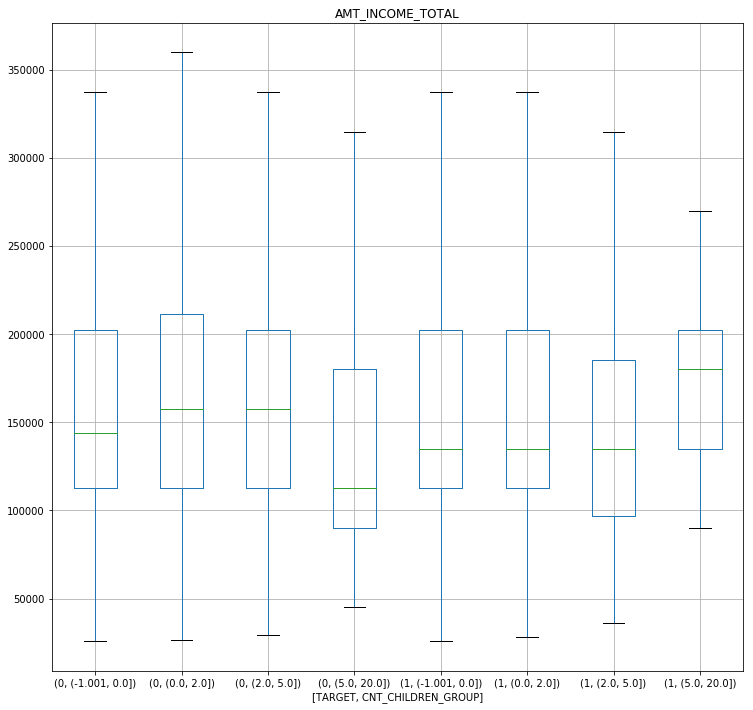

In [17]:
#2-2
"""
Your code here
"""
plt_column = "AMT_INCOME_TOTAL"
plt_by = ["TARGET", "CNT_CHILDREN_GROUP"]

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12)) 
# column引數表示要繪製成箱形圖的資料，可以是一列或多列
# by引數表示分組依據
plt.suptitle('') #增加標題 (沒加的話，標題上面會多一行說明)
plt.show()

In [32]:
grouped_df.describe() #202500

count           mean           std      min  \
TARGET CNT_CHILDREN_GROUP                                                   
0      (-1.001, 0.0]       198762.0  166747.010980  1.061799e+05  25650.0   
       (0.0, 2.0]           80081.0  174590.584401  1.201981e+05  26550.0   
       (2.0, 5.0]            3810.0  175053.742913  1.128427e+05  29250.0   
       (5.0, 20.0]             33.0  139159.090909  7.112483e+04  45000.0   
1      (-1.001, 0.0]        16609.0  160804.210548  8.483011e+04  25650.0   
       (0.0, 2.0]            7787.0  176115.362720  1.327159e+06  27900.0   
       (2.0, 5.0]             420.0  160677.385714  1.130315e+05  36000.0   
       (5.0, 20.0]              9.0  180000.000000  7.377118e+04  90000.0   

                                25%       50%       75%          max  
TARGET CNT_CHILDREN_GROUP                                             
0      (-1.001, 0.0]       112500.0  144000.0  202500.0   13500000.0  
       (0.0, 2.0]          112500.0  157500.0  211500.0   18000090.0  
       (2.0, 5.0]          112500.0  157500.0  202500.0    2250000.0  
       (5.0, 20.0]          90000.0  112500.0  180000.0     337500.0  
1      (-1.001, 0.0]       112500.0  135000.0  202500.0    1890000.0  
       (0.0, 2.0]          112500.0  135000.0  202500.0  117000000.0  
       (2.0, 5.0]           96750.0  135000.0  185625.0    1350000.0  
       (5.0, 20.0]         135000.0  180000.0  202500.0     315000.0

In [24]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-x.mean())/x.std())
#groupby可以自動對分組做各自的平均數、...表準化等 各種運算，很實用!!!!!

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135
